 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whales_path = Path("Resources/whale_returns.csv")
whales_df = pd.read_csv(whales_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whales_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whales_df.isnull().sum()



SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whales_df.dropna(inplace=True)
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp_path = Path("Resources/sp500_history.csv")
sp_df = pd.read_csv(sp_path, index_col ="Date", infer_datetime_format=True, parse_dates=True)
sp_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [9]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_df['Close'] = sp_df['Close'].str.replace('$', '')

C:\Users\jdbet\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [11]:
# Calculate Daily Returns
daily_returns = sp_df.astype(float).pct_change()
daily_returns


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [12]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={"Close": "S&P 500",})
daily_returns

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns_df = pd.concat([whales_df, algo_df, daily_returns], axis="columns", join="inner")
all_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

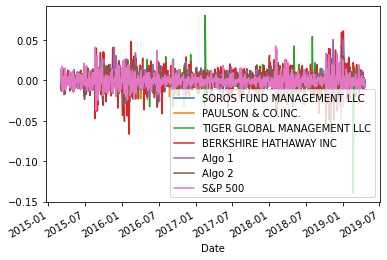

In [15]:
# Plot daily returns of all portfolios
all_returns_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

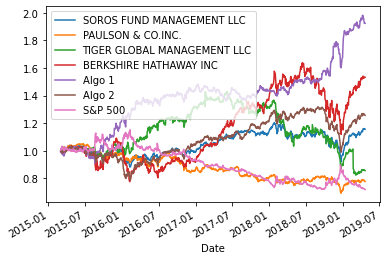

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns_df).cumprod()
# Plot cumulative returns

cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

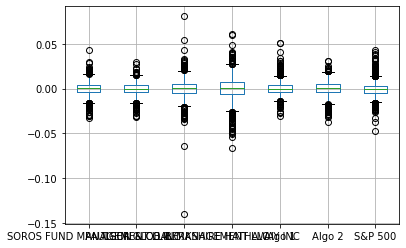

In [17]:
# Box plot to visually show risk
all_returns_df.boxplot()

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
all_returns_df.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
all_returns_df['S&P 500'].std()
# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = "Tiger Global and Berkshire Hathaway have a risker portfolio than the S&P 500 with a higher standard devation"

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
all_returns_vf = (all_returns_df.var()*252)
annualized_sd = np.sqrt(all_returns_vf)
annualized_sd


SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

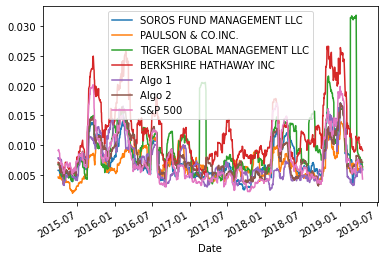

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns_rolling = all_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
all_returns_rolling.plot()

### Calculate and plot the correlation

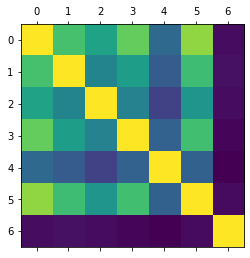

In [22]:
# Calculate the correlation
all_returns_correlation = all_returns_df.corr()
# Display de correlation matrix
import matplotlib.pyplot as plt

plt.matshow(all_returns_correlation)
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

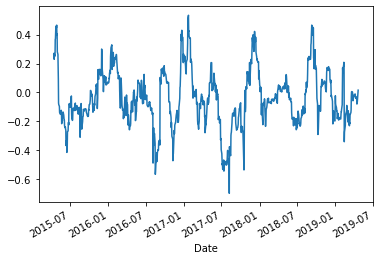

In [23]:
# Calculate covariance of a single portfolio
algo1_covariance = all_returns_df['Algo 1'].rolling(window=30).cov(all_returns_df['S&P 500'])
# Calculate variance of S&P 500
sp_variance = all_returns_df['S&P 500'].rolling(window=30).var()
# Computing beta
algo1_beta = algo1_covariance / sp_variance
algo1_beta
# Plot beta trend
algo1_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

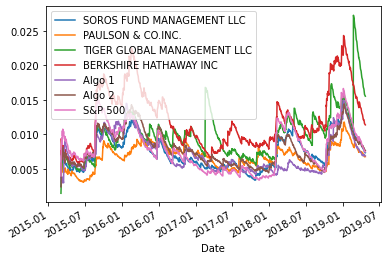

In [24]:
# Use `ewm` to calculate the rolling window
all_returns_df.ewm(halflife=21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
all_returns_sharp_ratio = (all_returns_df.mean()*252) / (all_returns_df.std() * np.sqrt(252))

<AxesSubplot:>

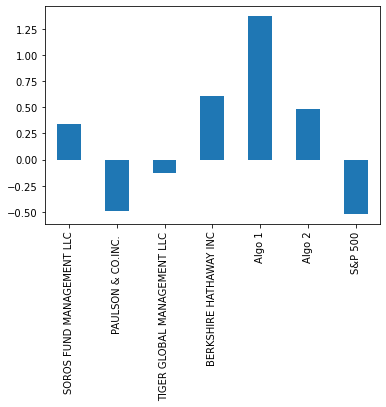

In [26]:
# Visualize the sharpe ratios as a bar plot
all_returns_sharp_ratio.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [55]:
# Reading data from 1st stock
fb_path = Path("Resources/fb_historical.csv")
fb_df = pd.read_csv(fb_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
fb_df.rename(columns={"Close" : "FB"}, inplace=True)


,FB
Date,
2018-05-01 16:00:00,173.86
2018-05-02 16:00:00,176.07
2018-05-03 16:00:00,174.02
2018-05-04 16:00:00,176.61
2018-05-07 16:00:00,177.97
...,...
2019-04-24 16:00:00,182.58
2019-04-25 16:00:00,193.26
2019-04-26 16:00:00,191.49


In [44]:
# Reading data from 2nd stock
mstr_path = Path("Resources/mstr_historical.csv")
mstr_df = pd.read_csv(mstr_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
mstr_df.rename(columns={"Close" : "MSTR"}, inplace=True)

In [45]:
# Reading data from 3rd stock
pypl_path = Path("Resources/pypl_historical.csv.csv")
pypl_df = pd.read_csv(mstr_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
pypl_df.rename(columns={"Close" : "PYPL"}, inplace=True)

In [46]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat([fb_df, mstr_df, pypl_df], axis="columns", join="inner")
my_stocks

,FB,MSTR,PYPL
Date,,,
2018-05-01 16:00:00,173.86,130.82,130.82
2018-05-02 16:00:00,176.07,130.31,130.31
2018-05-03 16:00:00,174.02,129.12,129.12
2018-05-04 16:00:00,176.61,130.20,130.20
2018-05-07 16:00:00,177.97,129.93,129.93
...,...,...,...
2019-04-24 16:00:00,182.58,149.54,149.54
2019-04-25 16:00:00,193.26,148.00,148.00
2019-04-26 16:00:00,191.49,149.42,149.42


In [56]:
# Reset Date index
my_stocks.sort_index(inplace=True)
my_stocks

,FB,MSTR,PYPL
Date,,,
2018-05-01 16:00:00,173.86,130.82,130.82
2018-05-02 16:00:00,176.07,130.31,130.31
2018-05-03 16:00:00,174.02,129.12,129.12
2018-05-04 16:00:00,176.61,130.20,130.20
2018-05-07 16:00:00,177.97,129.93,129.93
...,...,...,...
2019-04-24 16:00:00,182.58,149.54,149.54
2019-04-25 16:00:00,193.26,148.00,148.00
2019-04-26 16:00:00,191.49,149.42,149.42


In [32]:
# Reorganize portfolio data by having a column per symbol


In [64]:
# Calculate daily returns
my_stocks_returns = my_stocks.pct_change()
# Drop NAs
my_stocks_returns.dropna(inplace=True)
# Display sample data
my_stocks_returns.head()

,FB,MSTR,PYPL
Date,,,
2018-05-02 16:00:00,0.012711,-0.003898,-0.003898
2018-05-03 16:00:00,-0.011643,-0.009132,-0.009132
2018-05-04 16:00:00,0.014883,0.008364,0.008364
2018-05-07 16:00:00,0.007701,-0.002074,-0.002074
2018-05-08 16:00:00,0.005338,0.008543,0.008543


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [87]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio = my_stocks_returns.dot(weights) 
weighted_returns = pd.DataFrame(my_portfolio)
# Display sample data
weighted_returns

,0
Date,
2018-05-02 16:00:00,0.001638
2018-05-03 16:00:00,-0.009969
2018-05-04 16:00:00,0.010537
2018-05-07 16:00:00,0.001184
2018-05-08 16:00:00,0.007475
...,...
2019-04-24 16:00:00,-0.000478
2019-04-25 16:00:00,0.012633
2019-04-26 16:00:00,0.003344


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [90]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([weighted_returns, all_returns_df], axis = 'columns', join='inner')
combined_returns

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [38]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [39]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [40]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios


In [42]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!